In [1]:
import sys
sys.path.append('../mlai_research/')
import log
import utils
import cv2
import rasterio
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from PIL import Image
from spectral import imshow, open_image

In [2]:
logger = log.get_logger(__name__)
conf = utils.load_config("base")

17-Dec-23 11:58:02 - INFO - Starting 'load_config'.
17-Dec-23 11:58:02 - INFO - Finished 'load_config' in 0.0218 secs.


In [3]:
def normalize_band(band):
    """
    Normalize a single band of a hyperspectral image to the range [0, 1].
    
    Parameters:
    band (np.ndarray): Single band of a hyperspectral image.
    
    Returns:
    np.ndarray: Normalized band.
    """
    band_min, band_max = band.min(), band.max()
    return (band - band_min) / (band_max - band_min)


def normalize_image(image):
    """
    Normalize all bands of a hyperspectral image to the range [0, 1].
    
    Parameters:
    image (np.ndarray): Hyperspectral image data.
    
    Returns:
    np.ndarray: Normalized image data.
    """
    return np.stack([normalize_band(band) for band in image])


def load_hyperspectral_images(image_paths):
    images = []
    for path in image_paths:
        with rasterio.open(path) as src:
            img = src.read()
            # Transpose the image so that the channels are the last dimension
            img = img.transpose((1, 2, 0))
            images.append(img)
    return images


def plot_spectral_signature(pixel):
    # Plot the spectral signature
    plt.plot(pixel)
    plt.title('Spectral Signature')
    plt.xlabel('Band Number')
    plt.ylabel('Reflectance')
    plt.show()

In [4]:
hyps_fns = utils.get_filenames("../data/02_intermediate/03_cropped_tifs/", "tif", 'hyps')
hyps_seg_fns = utils.get_filenames("../data/03_primary/", "tif", 'hyps')
hyps_imgs = load_hyperspectral_images(hyps_fns)
hyps_seg_imgs = load_hyperspectral_images(hyps_seg_fns)

In [20]:
img_num = 0
# print(hyps_fns[img_num])
# hyps_img = hyps_imgs[img_num]

print(hyps_seg_fns[img_num])
hyps_seg_img = hyps_seg_imgs[img_num]

../data/03_primary/79_hyps_Datura_masked.tif


In [6]:
# len(hyps_imgs)
# hyps_imgs[0].shape

In [7]:
# Select a pixel
# pixel = hyps_img[43, 43, :]
pixel = hyps_seg_img[43, 43, :]

/opt/homebrew/Caskroom/miniforge/base/envs/mlai_rp2/lib/python3.9/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


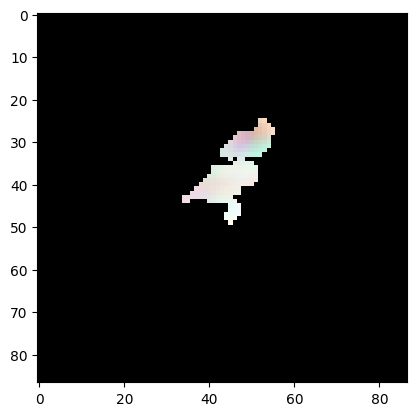

In [8]:
# view = imshow(hyps_img, (7, 4, 2))
view = imshow(hyps_seg_img, (7, 4, 2))

In [9]:
# Calculate statistics for each band
mean = np.mean(hyps_seg_img, axis=(0, 1))
std_dev = np.std(hyps_seg_img, axis=(0, 1))
mean, std_dev

(array([0.2716343, 1.8256044, 2.8126569, 2.9389615, 2.9009116, 1.510107 ,
        4.36993  , 3.5518563, 4.6667986, 3.817413 ], dtype=float32),
 array([ 1.7519414, 11.230443 , 17.30297  , 18.083954 , 17.846064 ,
         9.279055 , 26.871223 , 21.82924  , 28.629578 , 23.425325 ],
       dtype=float32))

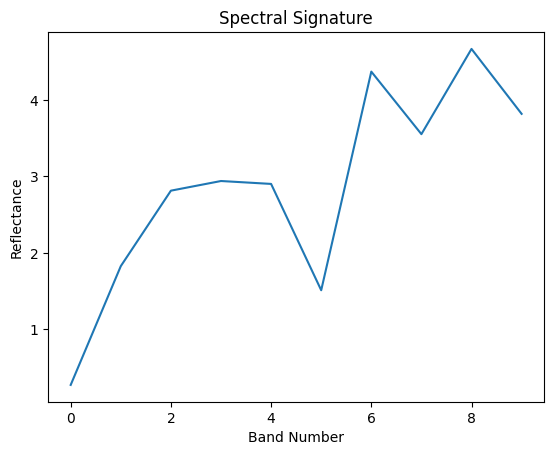

In [10]:
plot_spectral_signature(mean)

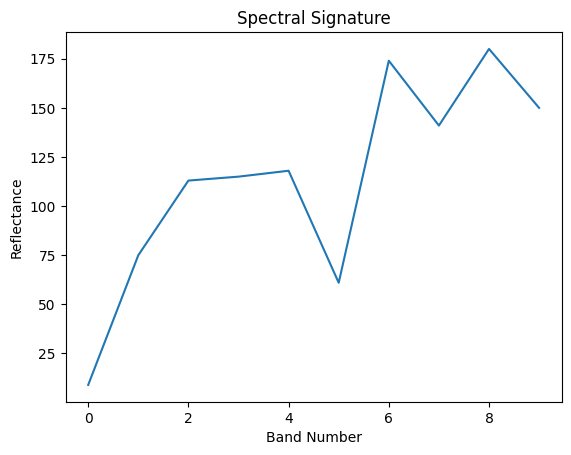

In [11]:
plot_spectral_signature(pixel)

In [12]:
# norm_hyps_img = normalize_image(hyps_seg_img)

In [13]:
# view = imshow(norm_hyps_img, (7, 4, 2))

In [14]:
# Select a pixel
# norm_pixel = norm_hyps_img[43, 43, :]

In [15]:
# plot_spectral_signature(norm_pixel)